* feature engeneering
* modelling
* prediction 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Importing libraries</h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
import time

seed=47

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
client_train=pd.read_csv('/content/drive/MyDrive/client_train.csv')
invoice_train=pd.read_csv('/content/drive/MyDrive/invoice_train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
client_train.shape

(135493, 6)

In [ ]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


# FEATURE ENGINEERING AND PREPROCESSING

In [ ]:
invoice_train.tarif_type.value_counts()

11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: tarif_type, dtype: int64

In [ ]:
invoice_train['invoice_date']=pd.to_datetime(invoice_train['invoice_date'])

In [ ]:
invoice_train["year"] = invoice_train["invoice_date"].dt.year
invoice_train["month"] = invoice_train["invoice_date"].dt.month

In [ ]:
# Group the data by client_id, year, and month
grouped = invoice_train.groupby(["client_id", "year", "month"])["consommation_level_1"].sum()

# Reset the index and pivot the data to create a new dataframe with columns for each client, year, and month
monthly_consumption = grouped.reset_index().pivot(index="client_id", columns=["year", "month"])

In [ ]:
grouped

client_id           year  month
train_Client_0      2005  10       124
                    2006  2        141
                          6        162
                          10       159
                    2007  2        182
                                  ... 
train_Client_99998  2005  8        400
                          12       200
train_Client_99999  1996  1        516
                          5        603
                          9        259
Name: consommation_level_1, Length: 2847209, dtype: int64

In [ ]:
grouped_invoice = invoice_train.groupby(["client_id"],as_index=False)["consommation_level_1", "consommation_level_2", "consommation_level_3", "consommation_level_4"].sum()

<ipython-input-13-4bba5debddd1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_invoice = invoice_train.groupby(["client_id"],as_index=False)["consommation_level_1", "consommation_level_2", "consommation_level_3", "consommation_level_4"].sum()


In [ ]:
grouped_invoice.head()

,client_id,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,train_Client_0,12334,370,0,0
1,train_Client_1,20629,0,0,0
2,train_Client_10,14375,682,0,0
3,train_Client_100,24,0,0,0
4,train_Client_1000,9292,1468,1643,514


In [ ]:
grouped_invoice.shape

(135493, 5)

In [ ]:
df=client_train.merge(grouped_invoice,on='client_id',how='left')

In [ ]:
df.shape

(135493, 10)

# MACHINE LEARNING
### MODEL BUILDING 
### MODEL TESTING
### HYPERPARAMETER TUNING
### RETEST MODELS

# IMPORTING LIBERARIES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
tr=pd.DataFrame(df)
#te=pd.DataFrame(client_test)
tr=tr.drop(['client_id','creation_date'],axis=1)
#te=te.drop(['client_id','creation_date'],axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(tr)

        disrict  client_catg  region  target  consommation_level_1  \
0            60           11     101     0.0                 12334   
1            69           11     107     0.0                 20629   
2            62           11     301     0.0                 14375   
3            69           11     105     0.0                    24   
4            62           11     303     0.0                  9292   
...         ...          ...     ...     ...                   ...   
135488       62           11     304     0.0                   139   
135489       63           11     311     0.0                  7620   
135490       63           11     311     0.0                  9831   
135491       60           11     101     0.0                   600   
135492       60           11     101     0.0                  1378   

        consommation_level_2  consommation_level_3  consommation_level_4  
0                        370                     0                     0  
1        

In [ ]:

y_train=tr['target']
x_train=tr.drop(['target'],axis=1)
y_train=y_train.astype(int)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=4,stratify=y_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#te=scaler.fit_transform(te)
print(x_train)

[[1.00000000e+00 0.00000000e+00 2.01342282e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.22222222e-01 0.00000000e+00 9.06040268e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.22222222e-01 0.00000000e+00 7.01342282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.22222222e-01 0.00000000e+00 9.06040268e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.22222222e-01 0.00000000e+00 6.71140940e-01 ... 9.44522969e-04
  3.66651929e-04 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00671141e-02 ... 1.69533189e-03
  0.00000000e+00 0.00000000e+00]]


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XG Boost',XGBClassifier()))
models.append(('Ada Boost',AdaBoostClassifier()))
#models.append(('Cat Boost', CatBoostClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.943982 (0.000167)
LDA: 0.943032 (0.000444)
KNN: 0.940827 (0.000896)
CART: 0.897485 (0.002496)
NB: 0.923640 (0.002223)
XG Boost: 0.943567 (0.000231)
Ada Boost: 0.944148 (0.000044)


# DECISION TREE CLASSIFIER

In [ ]:
modelD= DecisionTreeClassifier()
modelD.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_train_D = modelD.predict(x_train)
pred_test_D=modelD.predict(x_test)

In [ ]:
acc_train_D = accuracy_score(pred_train_D, y_train)
acc_test_D = accuracy_score(pred_test_D, y_test)
print(f'Training accuracy {acc_train_D: .3f}') 
print(f'Testing accuracy {acc_test_D: .3f}')

Training accuracy  0.999
Testing accuracy  0.881


In [ ]:
tuned_parameters = [{'criterion':['entropy'],
                     'max_leaf_nodes': range(100,200)}] # hyperparameters to tune

clf_D = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
clf_D.fit(x_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf_D.best_params_) # best hyperparameter balues

print("\nGrid scores:")
means_D = clf_D.cv_results_['mean_test_score'] # mean accuracy with folds
stds_D = clf_D.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(means_D, stds_D, clf_D.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

DecisionTreeClassifier(max_leaf_nodes=110)
Results on test data
Test accuracy =  0.9430
Test precision =  0.0789
Test recall =  0.0020
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25586
           1       0.08      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.51      0.50      0.49     27099
weighted avg       0.90      0.94      0.92     27099

Confusion matrix (Rows actual, Columns predicted):
       0   1
0  25551  35
1   1510   3

ROC curve


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


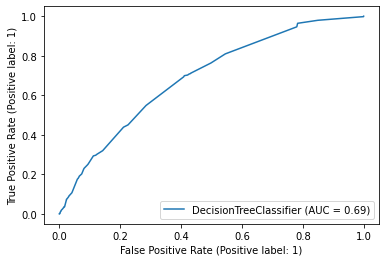

In [ ]:
good_model_D = DecisionTreeClassifier(criterion='gini',
                                    max_leaf_nodes=110) 
print(good_model_D) # display model parameters
good_model_D.fit(x_train, y_train) # train model
pred_D = good_model_D.predict(x_test)
print("Results on test data")
acc_D = accuracy_score(y_test, pred_D) # accuracy on test examples
prec_D = precision_score(y_test, pred_D) # precision on test examples
reca_D = recall_score(y_test, pred_D)
print(f'Test accuracy = {acc_D: .4f}')
print(f'Test precision = {prec_D: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_D: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_D))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_D)))
print('\nROC curve')
plot_roc_curve(good_model_D,x_test, y_test)  # 
plt.show()

# LOGISTIC REGRESSION

In [ ]:
model_lr=LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_train_lr = model_lr.predict(x_train)
pred_test_lr=model_lr.predict(x_test)

In [ ]:
acc_train_lr = accuracy_score(pred_train_lr, y_train)
acc_test_lr = accuracy_score(pred_test_lr, y_test)
print(f'Training accuracy {acc_train_lr: .3f}') 
print(f'Testing accuracy {acc_test_lr: .3f}')

Training accuracy  0.944
Testing accuracy  0.943


In [ ]:
tuned_parameters = [{'C': [10.0, 100.0, 1000.0, 10000.0],
                     'max_iter': [500, 1000]}] # hyperparameters to tune


clfL = GridSearchCV(LogisticRegression(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
clfL.fit(x_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfL.best_params_) # best hyperparameter values

print("\nGrid scores:")
meansL = clfL.cv_results_['mean_test_score'] # mean accuracy with folds
stdsL = clfL.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(meansL, stdsL, clfL.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished



Best parameters found:
{'criterion': 'entropy', 'max_leaf_nodes': 110}

Grid scores:
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 100}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 101}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 102}
0.944 (+/-0.001) for {'criterion': 'entropy', 'max_leaf_nodes': 103}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 104}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 105}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 106}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 107}
0.944 (+/-0.001) for {'criterion': 'entropy', 'max_leaf_nodes': 108}
0.944 (+/-0.001) for {'criterion': 'entropy', 'max_leaf_nodes': 109}
0.944 (+/-0.001) for {'criterion': 'entropy', 'max_leaf_nodes': 110}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 111}
0.944 (+/-0.000) for {'criterion': 'entropy', 'max_leaf_nodes': 112}
0.944 (+/-0.000) 

LogisticRegression(C=1000, max_iter=1000)
Results on test data
Test accuracy =  0.9280
Test precision =  0.1408
Test recall =  0.0568
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     25586
           1       0.14      0.06      0.08      1513

    accuracy                           0.93     27099
   macro avg       0.54      0.52      0.52     27099
weighted avg       0.90      0.93      0.91     27099

Confusion matrix (Rows actual, Columns predicted):
       0    1
0  25061  525
1   1427   86

ROC curve


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


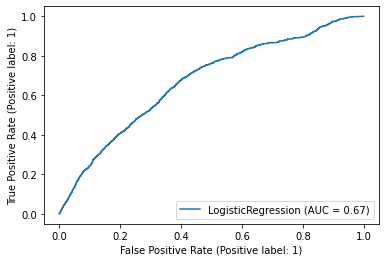

In [ ]:
# Specify non-default hyper-parameter values
C = 1000
max_iter = 1000
# Train and test model
good_modelL = LogisticRegression(C = C, max_iter=max_iter) # create model 
print(good_modelL) # display model parameters
good_modelL.fit(x_train,y_train) # train model
predL = good_modelL.predict(x_test) # predicted output for test examples
print("Results on test data")
accL = accuracy_score(y_test, predL) # accuracy on test examples
precL = precision_score(y_test, predL) # precision on test examples
recaL = recall_score(y_test, predL) # recall on test examples
print(f'Test accuracy = {accL: .4f}') # round to 4 decimal places
print(f'Test precision = {precL: .4f}') # round to 4 decimal places
print(f'Test recall = {recaL: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predL))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predL)))
print('\nROC curve')
plot_roc_curve(good_modelL, x_test, y_test)  # 
plt.show()

# KNN

In [ ]:
model_knn=KNeighborsClassifier().fit(x_train, y_train)

In [ ]:
pred_train_knn = model_knn.predict(x_train)
pred_test_knn=model_knn.predict(x_test)

In [ ]:
acc_train_knn = accuracy_score(pred_train_knn, y_train)
acc_test_knn = accuracy_score(pred_test_knn, y_test)
print(f'Training accuracy {acc_train_lr: .3f}') 
print(f'Testing accuracy {acc_test_lr: .3f}')

Training accuracy  0.944
Testing accuracy  0.943


In [ ]:
tuned_parameters_knn= [{'algorithm':['brute'],
                     'metric': ['euclidean', 'minkowski'],
                    'n_neighbors': [5, 10, 20]}] # hyperparameters to tune

clfknn = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knn, 
                   verbose=1, n_jobs=-1) # grid search model
clfknn.fit(x_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfknn.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansknn = clfknn.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clfknn.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(meansknn, stdsknn, clfknn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Best parameters found:
{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}

Grid scores:
0.941 (+/-0.002) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5}
0.944 (+/-0.000) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10}
0.944 (+/-0.000) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}
0.941 (+/-0.002) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}
0.944 (+/-0.000) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 10}
0.944 (+/-0.000) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 20}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.2min finished


KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=20)
Results on test data
Test accuracy =  0.9441
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25586
           1       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099

Confusion matrix (Rows actual, Columns predicted):
       0  1
0  25584  2
1   1513  0

ROC curve


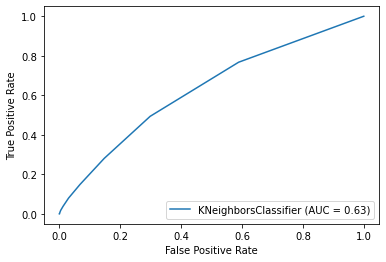

In [ ]:
good_modelknn = KNeighborsClassifier(algorithm='brute', metric='euclidean', 
                                  n_neighbors=20) # create model 
print(good_modelknn) # display model parameters
good_modelknn.fit(x_train, y_train) # train model
predknn = good_modelknn.predict(x_test) # predicted output for test examples
print("Results on test data")
accknn = accuracy_score(y_test, predknn) # accuracy on test examples
precknn = precision_score(y_test, predknn) # precision on test examples
recaknn = recall_score(y_test, predknn) # recall on test examples
print(f'Test accuracy = {accknn: .4f}') # round to 4 decimal places
print(f'Test precision = {precknn: .4f}') # round to 4 decimal places
print(f'Test recall = {recaknn: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predknn))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predknn)))
print('\nROC curve')
plot_roc_curve(good_modelknn, x_test, y_test)  # 
plt.show()

# XGB BOOSTING

In [ ]:
model_xgb=XGBClassifier().fit(x_train, y_train)

In [ ]:
pred_train_xgb = model_xgb.predict(x_train)
pred_test_xgb=model_xgb.predict(x_test)

In [ ]:
acc_train_xgb = accuracy_score(pred_train_xgb, y_train)
acc_test_xgb = accuracy_score(pred_test_xgb, y_test)
print(f'Training accuracy {acc_train_xgb: .3f}') 
print(f'Testing accuracy {acc_test_xgb: .3f}')

Training accuracy  0.947
Testing accuracy  0.943


In [ ]:
tuned_parameters_xgb=[{'booster':['gbtree'], 'objective':['binary:logistic'], 'eta':[0.1,0.2], 'max_depth':[5], 'subsample':[0.7,0.6],
                       'colsample_bytree':[0.6,0.5], 'colsample_bylevel':[0.9,1], 'colsample_bynode':[0.8], 'alpha':[0.2], 'lambda':[0.3,0.4],
                       'n_estimators':[200,250]}]
clfxgb = GridSearchCV(XGBClassifier(), tuned_parameters_xgb, verbose=1, n_jobs=-1) # grid search model
clfxgb.fit(x_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfxgb.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansknn = clfxgb.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clfxgb.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(meansknn, stdsknn, clfxgb.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min


KeyboardInterrupt: 

XGBClassifier(alpha=0.2, base_score=None, booster='gbtree',
              colsample_bylevel=0.9, colsample_bynode=0.8, colsample_bytree=0.5,
              eta=0.1, gamma=None, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=5, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42,
              reg_alpha=None, reg_lambda=0.4, scale_pos_weight=None,
              subsample=0.7, tree_method=None, validate_parameters=None,
              verbosity=1)
Results on test data
Test accuracy =  0.9438
Test precision =  0.2000
Test recall =  0.0020
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25586
           1       0.20      0.00      0.00      1513

    accuracy                           0.94     27099
   macro a

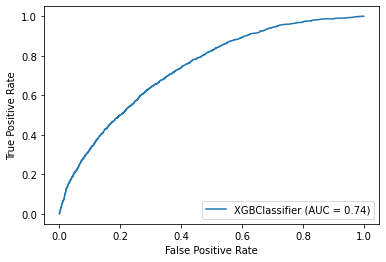

In [ ]:
good_modelxgb= XGBClassifier(booster='gbtree', objective='binary:logistic', eta=0.1, max_depth=5, subsample=0.7,colsample_bytree=0.5, colsample_bylevel=0.9, colsample_bynode=0.8,
                             alpha=0.2, reg_lambda= 0.4, n_estimators=200, random_state=42, verbosity=1) # create model 
print(good_modelxgb) # display model parameters
good_modelxgb.fit(x_train,y_train) # train model
predxgb = good_modelxgb.predict(x_test) # predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predxgb) # accuracy on test examples
precsvm = precision_score(y_test, predxgb) # precision on test examples
recasvm = recall_score(y_test, predxgb) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predxgb))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predxgb)))
print('\nROC curve')
plot_roc_curve(good_modelxgb, x_test, y_test)  # 
plt.show()

# ADABOOST CLASSIFIER 

In [ ]:
model_ada=AdaBoostClassifier().fit(x_train, y_train)

In [ ]:
pred_train_ada = model_ada.predict(x_train)
pred_test_ada=model_ada.predict(x_test)

In [ ]:
acc_train_ada = accuracy_score(pred_train_ada, y_train)
acc_test_ada = accuracy_score(pred_test_ada, y_test)
print(f'Training accuracy {acc_train_ada: .3f}') 
print(f'Testing accuracy {acc_test_ada: .3f}')

Training accuracy  0.944
Testing accuracy  0.944


In [ ]:
tuned_parameters_ada = {
    'n_estimators': [20,25],
    'learning_rate': [0.1,0.5,1],
    'algorithm': ['SAMME.R']
}
clfada = GridSearchCV(AdaBoostClassifier(), tuned_parameters_ada,cv=5) # grid search model
clfada.fit(x_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfada.best_params_) # best hyperparameter balues
print("\nGrid scores:")
meansknn = clfada.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clfada.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(meansknn, stdsknn, clfada.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 


Best parameters found:
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 20}

Grid scores:
0.944 (+/-0.000) for {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 20}
0.944 (+/-0.000) for {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 25}
0.944 (+/-0.000) for {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 20}
0.944 (+/-0.000) for {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 25}
0.944 (+/-0.000) for {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 20}
0.944 (+/-0.000) for {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 25}


AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=42)
Results on test data
Test accuracy =  0.9442
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25586
           1       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099

Confusion matrix (Rows actual, Columns predicted):
       0  1
0  25586  0
1   1513  0

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


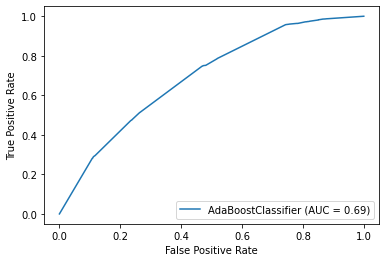

In [ ]:
good_model_ada= AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.1, n_estimators= 20,random_state=42) # create model 
print(good_model_ada) # display model parameters
good_model_ada.fit(x_train,y_train) # train model
pred_ada = good_model_ada.predict(x_test) # predicted output for test examples
print("Results on test data")
accada= accuracy_score(y_test, pred_ada) # accuracy on test examples
precada = precision_score(y_test, pred_ada) # precision on test examples
recaada = recall_score(y_test, pred_ada) # recall on test examples
print(f'Test accuracy = {accada: .4f}') # round to 4 decimal places
print(f'Test precision = {precada: .4f}') # round to 4 decimal places
print(f'Test recall = {recaada: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_ada))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_ada)))
print('\nROC curve')
plot_roc_curve(good_model_ada, x_test, y_test)  # 
plt.show()

# CATBOOST

In [ ]:
model_cat=CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.076187
0:	learn: 0.5940110	total: 89.5ms	remaining: 1m 29s
1:	learn: 0.5171355	total: 123ms	remaining: 1m 1s
2:	learn: 0.4573081	total: 154ms	remaining: 51.3s
3:	learn: 0.4082333	total: 187ms	remaining: 46.5s
4:	learn: 0.3662934	total: 220ms	remaining: 43.8s
5:	learn: 0.3359455	total: 255ms	remaining: 42.3s
6:	learn: 0.3111549	total: 289ms	remaining: 41s
7:	learn: 0.2916222	total: 318ms	remaining: 39.4s
8:	learn: 0.2748285	total: 348ms	remaining: 38.3s
9:	learn: 0.2614318	total: 377ms	remaining: 37.4s
10:	learn: 0.2510238	total: 404ms	remaining: 36.3s
11:	learn: 0.2430260	total: 427ms	remaining: 35.1s
12:	learn: 0.2361182	total: 459ms	remaining: 34.9s
13:	learn: 0.2296210	total: 490ms	remaining: 34.5s
14:	learn: 0.2246696	total: 515ms	remaining: 33.8s
15:	learn: 0.2201222	total: 545ms	remaining: 33.5s
16:	learn: 0.2162657	total: 575ms	remaining: 33.3s
17:	learn: 0.2134622	total: 607ms	remaining: 33.1s
18:	learn: 0.2108947	total: 637ms	remaining: 32.9s
19:	learn: 

In [ ]:
pred_train_cat = model_cat.predict(x_train)
pred_test_cat=model_cat.predict(x_test)

In [ ]:
acc_train_cat = accuracy_score(pred_train_cat, y_train)
acc_test_cat = accuracy_score(pred_test_cat, y_test)
print(f'Training accuracy {acc_train_cat: .3f}') 
print(f'Testing accuracy {acc_test_cat: .3f}')

Training accuracy  0.948
Testing accuracy  0.941


In [ ]:
tuned_parameters_cat =  {'iterations': [100, 500], #, 1000
              'depth': [2, 5],#, 8, 10
              'learning_rate': [0.05, 0.1], #0.01, 0.2
              'loss_function': ['Logloss', 'CrossEntropy'],
              'eval_metric': ['Accuracy', 'F1'],
              'random_seed': [42],
              'od_type': ['IncToDec', 'Iter'],
              'od_wait': [10, 50],#, 100
              'l2_leaf_reg': [1, 3, 5],#, 7, 10
              'rsm': [0.5, 0.7] #, 0.9, 1.0
                        }
clf_cat = GridSearchCV(CatBoostClassifier(), tuned_parameters_cat,cv=5) # grid search model
clf_cat.fit(x_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfada.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansknn = clf_cat.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clf_cat.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(meansknn, stdsknn, clfada.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

0:	learn: 0.9441504	total: 10.4ms	remaining: 1.03s
1:	learn: 0.9441504	total: 19.7ms	remaining: 965ms
2:	learn: 0.9441504	total: 28ms	remaining: 904ms
3:	learn: 0.9441504	total: 36.3ms	remaining: 871ms
4:	learn: 0.9441504	total: 44.6ms	remaining: 847ms
5:	learn: 0.9441504	total: 53.1ms	remaining: 832ms
6:	learn: 0.9441504	total: 61.4ms	remaining: 816ms
7:	learn: 0.9441504	total: 70.1ms	remaining: 806ms
8:	learn: 0.9441504	total: 78.2ms	remaining: 791ms
9:	learn: 0.9441504	total: 86.8ms	remaining: 781ms
10:	learn: 0.9441504	total: 95.1ms	remaining: 770ms
11:	learn: 0.9441504	total: 103ms	remaining: 758ms
12:	learn: 0.9441504	total: 113ms	remaining: 754ms
13:	learn: 0.9441504	total: 121ms	remaining: 745ms
14:	learn: 0.9441504	total: 130ms	remaining: 735ms
15:	learn: 0.9441504	total: 138ms	remaining: 726ms
16:	learn: 0.9441504	total: 147ms	remaining: 717ms
17:	learn: 0.9441504	total: 156ms	remaining: 709ms
18:	learn: 0.9441504	total: 164ms	remaining: 700ms
19:	learn: 0.9441504	total: 173m

0:	learn: 0.0000000	total: 41.2ms	remaining: 41.1s
1:	learn: 0.0000000	total: 89.2ms	remaining: 44.5s
2:	learn: 0.0000000	total: 131ms	remaining: 43.6s
3:	learn: 0.0000000	total: 169ms	remaining: 42.1s
4:	learn: 0.0000000	total: 211ms	remaining: 41.9s
5:	learn: 0.0000000	total: 253ms	remaining: 42s
6:	learn: 0.0000000	total: 291ms	remaining: 41.3s
7:	learn: 0.0000000	total: 309ms	remaining: 38.3s
8:	learn: 0.0000000	total: 327ms	remaining: 36s
9:	learn: 0.0000000	total: 368ms	remaining: 36.4s
10:	learn: 0.0000000	total: 408ms	remaining: 36.7s
11:	learn: 0.0000000	total: 437ms	remaining: 36s
12:	learn: 0.0000000	total: 467ms	remaining: 35.4s
13:	learn: 0.0000000	total: 507ms	remaining: 35.7s
14:	learn: 0.0000000	total: 546ms	remaining: 35.8s
15:	learn: 0.0000000	total: 590ms	remaining: 36.3s
16:	learn: 0.0000000	total: 638ms	remaining: 36.9s
17:	learn: 0.0000000	total: 694ms	remaining: 37.9s
18:	learn: 0.0000000	total: 737ms	remaining: 38s
19:	learn: 0.0000000	total: 782ms	remaining: 38

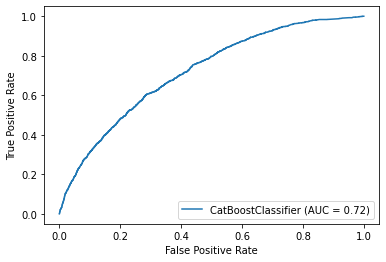

In [ ]:
good_model_cat = CatBoostClassifier(iterations=1000, depth=8, learning_rate=0.1,
                           loss_function="CrossEntropy", eval_metric="F1",
                           random_seed=42, od_type="Iter", od_wait=50,
                           l2_leaf_reg=5, rsm=0.8)
print(good_model_cat) # display model parameters
good_model_cat.fit(x_train, y_train) # train model
pred_cat = good_model_cat.predict(x_test) # predicted output for test examples
print("Results on test data")
acc_cat = accuracy_score(y_test, pred_cat) # accuracy on test examples
prec_cat= precision_score(y_test, pred_cat) # precision on test examples
reca_cat = recall_score(y_test, pred_cat) # recall on test examples
print(f'Test accuracy = {acc_cat: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_cat: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_cat: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_cat))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_cat)))
print('\nROC curve')
plot_roc_curve(good_model_cat, x_test, y_test)
plt.show() 

In [ ]:
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
predictions=model.predict(te)
print(predictions)
#print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

[0 0 0 ... 0 0 0]


              client_id  target
0         test_Client_0       0
1         test_Client_1       0
2        test_Client_10       0
3       test_Client_100       0
4      test_Client_1000       0
...                 ...     ...
58064  test_Client_9995       0
58065  test_Client_9996       0
58066  test_Client_9997       0
58067  test_Client_9998       0
58068  test_Client_9999       0

[58069 rows x 2 columns]


In [ ]:
df.target.value_counts()

0    58069
Name: target, dtype: int64

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
modelsvm=svm.SVC().fit(x_train,y_train)

In [ ]:
pred_trainsvm = modelsvm.predict(x_train)
pred_testsvm=modelsvm.predict(x_test)

In [ ]:
acc_trainsvm = accuracy_score(pred_trainsvm, y_train)
acc_testsvm = accuracy_score(pred_testsvm, y_test)
print(f'Training accuracy {acc_trainsvm: .3f}') 
print(f'Testing accuracy {acc_testsvm: .3f}')

Training accuracy  0.944
Testing accuracy  0.944


In [ ]:
tuned_parameters = [{'kernel':['linear'], 'gamma':[1], 'C':[1]}]
                     # hyperparameters to tune

clfsvm = GridSearchCV(svm.SVC(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
clfsvm.fit(x_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfsvm.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansvm = clfsvm.cv_results_['mean_test_score'] # mean accuracy with folds
stdsvm = clfsvm.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(meansvm, stdsvm, clfsvm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

SVC(C=1, gamma=0.1, kernel='linear')
Results on test data
Test accuracy =  0.9442
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25586
           1       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099

Confusion matrix (Rows actual, Columns predicted):
       0  1
0  25586  0
1   1513  0

ROC curve


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

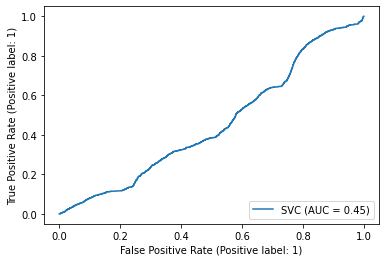

In [ ]:
# Specify non-default hyper-parameter values
C = 1 # algorithm name
kernel = 'linear'# kernel type
gamma =  0.1 # kernel parameter
# Train and test model
good_modelsvm = svm.SVC(C=C, kernel=kernel, 
                                  gamma=gamma) # create model 
print(good_modelsvm) # display model parameters
good_modelsvm.fit(x_train,y_train) # train model
predsvm = good_modelsvm.predict(x_test) # predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predsvm) # accuracy on test examples
precsvm = precision_score(y_test, predsvm) # precision on test examples
recasvm = recall_score(y_test, predsvm) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predsvm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predsvm)))
print('\nROC curve')
plot_roc_curve(good_modelsvm, x_test, y_test)  # 
plt.show()

<h2>Basic EDA</h2>

We won't show full EDA, just want to attract your attention to tips which help us to reach good score.

In next two cells you will find value counts according each column in train and test set. This information we'll use in feature engeneering  

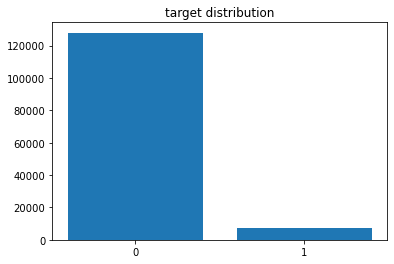

In [ ]:
ds = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

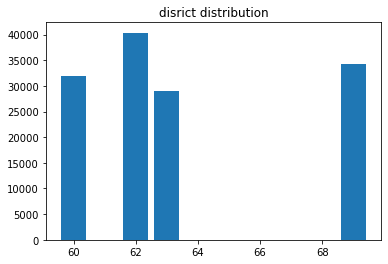

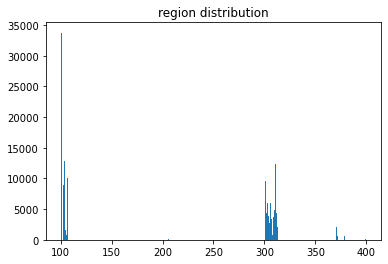

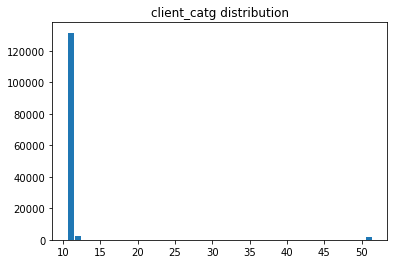

In [ ]:
for col in ['disrict','region','client_catg']:
    ds = client_train.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

In [ ]:
print('Number of missing rows in invoice_train:',invoice_train.isna().sum().sum())
print('Number of missing rows in invoice_test:',invoice_test.isna().sum().sum(),'\n')
print('Number of missing rows in client_train:',client_train.isna().sum().sum())
print('Number of missing rows in client_test:',client_test.isna().sum().sum())

Number of missing rows in invoice_train: 0
Number of missing rows in invoice_test: 0 

Number of missing rows in client_train: 0
Number of missing rows in client_test: 0


In [ ]:
print('Number of unique values in invoice_train:')
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

Number of unique values in invoice_train:
client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 12
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


<h2>Feature engeneering</h2>

In this part we want to explain the most powerful decision in our notebook - feature creation

In [ ]:
def feature_change(cl, inv):

    cl['client_catg'] = cl['client_catg'].astype('category')
    cl['disrict'] = cl['disrict'].astype('category')
    cl['region'] = cl['region'].astype('category')
    cl['region_group'] = cl['region'].apply(lambda x: 100 if x<100 else 300 if x>300 else 200)
    cl['creation_date'] = pd.to_datetime(cl['creation_date'])
    
    cl['coop_time'] = (2019 - cl['creation_date'].dt.year)*12 - cl['creation_date'].dt.month

    inv['counter_type'] = inv['counter_type'].map({"ELEC":1,"GAZ":0})
    inv['counter_statue'] = inv['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,769:5,'0':0,'5':5,'1':1,'4':4,'A':0,618:5,269375:5,46:5,420:5})
    
    inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], dayfirst=True)
    inv['invoice_month'] = inv['invoice_date'].dt.month
    inv['invoice_year'] = inv['invoice_date'].dt.year
    inv['is_weekday'] = ((pd.DatetimeIndex(inv.invoice_date).dayofweek) // 5 == 1).astype(float)
    inv['delta_index'] = inv['new_index'] - inv['old_index']
    
    return cl, inv

* 'client_catg', 'district' and 'region' were assigned as categories to use them as categorical features in lgbm (as for me, lgbm for default threats with cat features slightly better than other encoders such as catboost/target encoder)
* 'region_group' created simply by dividing 'region' in 3 groups (we purposed that regions weren't randomly decoded)
* 'coop_time' - amount of time since account creation in months
* 'counter_type' was binary encoded 
* 'counter_statue' cleaned from mislabeled values
* extracted month, year from 'invoice_date', also added binary feature - 'is_weekday'
* not sure about any logical sense in 'delta_index', but it improved score

In [ ]:
client_train1, invoice_train1 = feature_change(client_train, invoice_train)
client_test1, invoice_test1 = feature_change(client_test, invoice_test)

In [ ]:
def agg_feature(invoice, client_df, agg_stat):
    
    invoice['delta_time'] = invoice.sort_values(['client_id','invoice_date']).groupby('client_id')['invoice_date'].diff().dt.days.reset_index(drop=True)
    agg_trans = invoice.groupby('client_id')[agg_stat+['delta_time']].agg(['mean','std','min','max'])
    
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = invoice.groupby('client_id').size().reset_index(name='transactions_count')
    agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')
    
    weekday_avg = invoice.groupby('client_id')[['is_weekday']].agg(['mean'])
    weekday_avg.columns = ['_'.join(col).strip() for col in weekday_avg.columns.values]
    weekday_avg.reset_index(inplace=True)
    client_df = pd.merge(client_df, weekday_avg, on='client_id', how='left')
    
    full_df = pd.merge(client_df, agg_trans, on='client_id', how='left')
    
    full_df['invoice_per_cooperation'] = full_df['transactions_count'] / full_df['coop_time']
    
    return full_df

* created some aggregation features (min/max/mean/std) over continious columns per every client
* added 'delta_time' - amount of time between invoices for each user
* created 'invoice_per_cooperation' - number of transactions per some amount of time

In [ ]:
agg_stat_columns = [
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type',
 'invoice_month',
 'invoice_year',
 'delta_index'
]

train_df1 = agg_feature(invoice_train1, client_train1, agg_stat_columns)
test_df1 = agg_feature(invoice_test1, client_test1, agg_stat_columns)

In [ ]:
def new_features(df):
    
    for col in agg_stat_columns:
        df[col+'_range'] = df[col+'_max'] - df[col+'_min']
        df[col+'_max_mean'] = df[col+'_max']/df[col+'_mean']
    
    return df

Also we created statistical 'max_mean' and 'range' features which noticeably improved score

In [ ]:
train_df2 = new_features(train_df1)
test_df2 = new_features(test_df1)

Now let's review how many features did we create:

In [ ]:
print('Initial number of columns: ', len(client_train.columns)+len(invoice_train.columns))
print('Number of columns now: ', len(train_df2.columns))

Initial number of columns:  29
Number of columns now:  111


In [ ]:
def drop(df):

    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        df.drop([col], axis=1, inplace=True)
    return df

* we created really a lot of features and sure, not all of them were usefull, so we dropped some unnessesary columns in next few cells
* 'drop_col' array was made after using our own backward feature selection function

In [ ]:
train_df = drop(train_df2)
test_df = drop(test_df2)

In [ ]:
y = train_df['target']
X = train_df.drop('target',axis=1)

feature_name = X.columns.tolist()

In [ ]:
drop_col=['reading_remarque_max','counter_statue_min','counter_type_min','counter_type_max','counter_type_range',
          'tarif_type_max', 'delta_index_min', 'consommation_level_4_mean',"delta_index_max_mean"]

X = X.drop(drop_col, axis=1)
test_df = test_df.drop(drop_col, axis=1)

<h2>Modelling</h2>

* we used [optuna](https://optuna.org/) for hyperparameters tuning
* it was performed with respect to StratifiedKFold cross validation on 5 folds
* you can check parameters for tuning and their final values in cells below

In [ ]:
from optuna import Trial
import gc
import optuna
from sklearn.model_selection import train_test_split
import lightgbm as lgb

category_cols = ['disrict', 'client_catg', 'region']

def objective(trial:Trial):
    
    gc.collect()
    models=[]
    validScore=0
   
    model,log = fitLGBM(trial,X,y)
    
    models.append(model)
    gc.collect()
    validScore+=log
    validScore/=len(models)
    
    return validScore

In [ ]:
def fitLGBM(trial,X, y):
    
    params={
      'n_estimators':trial.suggest_int('n_estimators', 0, 1000), 
      'num_leaves':trial.suggest_int('num_leaves', 2, 512),
      'max_depth':trial.suggest_int('max_depth', 2, 128),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.15),
      'min_split_gain': trial.suggest_loguniform('min_split_gain', 0.001, 0.1),
      'feature_fraction':trial.suggest_uniform('feature_fraction',0.1, 1.0),
      'bagging_freq':trial.suggest_int('bagging_freq',0.1,10),
      'verbosity': -1,
      'random_state':seed
            }
    stkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    model = LGBMClassifier(**params)
    
    res=[]
    for i, (tdx, vdx) in enumerate(stkfold.split(X, y)):
        X_train, X_valid, y_train, y_valid = X.iloc[tdx], X.iloc[vdx], y[tdx], y[vdx]
        model.fit(X_train, y_train,
                 eval_set=[(X_train, y_train), (X_valid, y_valid)],
                 early_stopping_rounds=30, verbose=False)
        preds = model.predict_proba(X_valid)
        res.append(roc_auc_score(y_valid, preds[:,1]))
    
    err = np.mean(res)
    
    return model, err

In [ ]:
#study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
#study.optimize(objective, , timeout=60*60*2)

In [ ]:
model = LGBMClassifier(random_state=seed, n_estimators=830,num_leaves=454, max_depth=61,
                       learning_rate=0.006910869038433314, min_split_gain=0.00667926424629105, 
                       feature_fraction=0.3764303138879782, bagging_freq=8)

stkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

def calc(X, y, model, cv):
    res=[]
    local_probs=pd.DataFrame()
    probs = pd.DataFrame()

    for i, (tdx, vdx) in enumerate(cv.split(X, y)):
        X_train, X_valid, y_train, y_valid = X.iloc[tdx], X.iloc[vdx], y[tdx], y[vdx]
        model.fit(X_train, y_train,
                 eval_set=[(X_train, y_train), (X_valid, y_valid)],
                 early_stopping_rounds=30, verbose=False)
        
        preds = model.predict_proba(X_valid)
        oof_predict = model.predict_proba(test_df)
        local_probs['fold_%i'%i] = oof_predict[:,1]
        res.append(roc_auc_score(y_valid, preds[:,1]))

    print('ROC AUC:', round(np.mean(res), 6))    
    local_probs['res'] = local_probs.mean(axis=1)
    probs['target'] = local_probs['res']
    
    return probs

<h2>Prediction and submission</h2>

In the next few cells you can see our local cross validation which almost match  LB score

In [ ]:
%%time
probs = calc(X, y, model, stkfold)

ROC AUC: 0.884603
CPU times: user 22min 29s, sys: 15.1 s, total: 22min 44s
Wall time: 5min 48s


In [ ]:
submission = pd.DataFrame({
        "client_id": sample_submission["client_id"],
        "target": probs['target']
    })
submission.to_csv('submission.csv', index=False)

To sum up, at the time of publication of the notebook, we got 4th place in this competition!Thank you for watching, waiting your comments!

<img src="https://raw.githubusercontent.com/imgremlin/Photos/master/lb.png" width="700"> 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
#dtc.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.4s finished


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X.isnull().sum()